In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import IsolationForest

In [2]:
path = 'D:/Study/McGill University - MMA/Courses/INSY 695/Team Project/Data/'
df_raw = pd.read_csv(path+"media prediction and its cost NEW.csv")

In [3]:
num_cols, cate_cols, pre_dum_cols = [], [], []
for c in df_raw.columns:
    uni_len = len(set(df_raw[c]))
    dtype = df_raw[c].dtypes

    if dtype == object:
        cate_cols.append(c)
    else: # dtype == float
        if uni_len == 2:
            pre_dum_cols.append(c)
        elif uni_len < 10:
            num_cols.append(c)
            print("Number of unique values: %d \t Datatype: %s \t Column name: %s" %(uni_len, dtype, c))
        else:
            num_cols.append(c)

Number of unique values: 6 	 Datatype: int64 	 Column name: unit_sales(in millions)
Number of unique values: 6 	 Datatype: int64 	 Column name: total_children
Number of unique values: 5 	 Datatype: int64 	 Column name: avg_cars_at home(approx)
Number of unique values: 6 	 Datatype: int64 	 Column name: num_children_at_home
Number of unique values: 5 	 Datatype: int64 	 Column name: avg_cars_at home(approx).1


In [4]:
df_raw.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4,Bag Stuffers,USA,M,F,...,8670,5415,13610,1,1,1,1,1,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4,Bag Stuffers,USA,M,F,...,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",126.62
2,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3,Cash Register Lottery,USA,M,M,...,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",59.86
3,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2,High Roller Savings,USA,S,F,...,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",84.16
4,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2,Cash Register Lottery,USA,M,F,...,18670,5415,3610,1,1,1,1,1,In-Store Coupon,95.78


# Model Development

In [5]:
y = df_raw['cost']
X = df_raw.drop(columns = ['cost'])
X = pd.get_dummies(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train_final, X_test_final, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [7]:
X_test_final, X_val_final, y_test, y_val = train_test_split(X_test_final, y_test, test_size = 0.5, random_state = 0)

Since the model from TPOT yielded the lowest RMSE, we train the model based on parameters derived from TPOT as our final model.

In [8]:
from sklearn.ensemble import ExtraTreesRegressor
extratree_best = ExtraTreesRegressor(random_state = 0, bootstrap=False, max_features=0.25, min_samples_leaf=3, min_samples_split=4, n_estimators=100)
final_model_opt = extratree_best.fit(X_train_final, y_train)
y_test_pred_final = final_model_opt.predict(X_test_final)

In [9]:
from sklearn.metrics import mean_squared_error
final_model_opt_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
final_model_opt_mse

0.8370493487269288

# Model Interpretation

Feature Importances

In [10]:
feature_significances = pd.DataFrame(data = final_model_opt.feature_importances_, index = X_train_final.columns.to_numpy(), columns = ['feature significance'])
feature_significances.sort_values('feature significance', ascending = False).head(10)

,feature significance
promotion_name_Free For All,0.030259
promotion_name_Super Savers,0.024277
promotion_name_Price Slashers,0.023900
promotion_name_Save-It Sale,0.022458
promotion_name_Weekend Markdown,0.021975
media_type_Cash Register Handout,0.021568
promotion_name_Double Down Sale,0.021167
promotion_name_Money Savers,0.021012
promotion_name_Big Time Discounts,0.020412
"media_type_Sunday Paper, Radio",0.020342


SHAP

In [11]:
!pip install shap

In [12]:
import shap

In [13]:
X_test_sample = X_test_final[:100]

In [14]:
explainer = shap.Explainer(final_model_opt)
shap_values = explainer(X_test_sample)

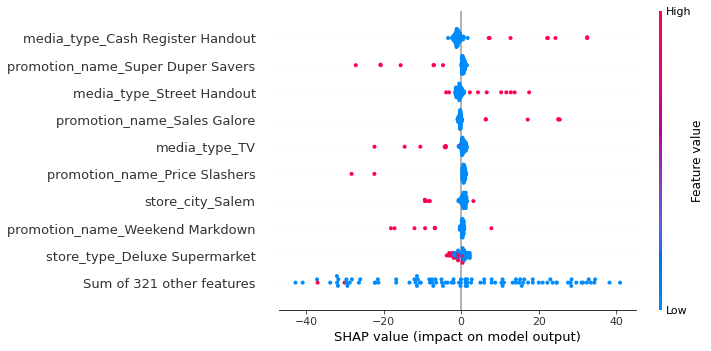

In [15]:
shap.plots.beeswarm(shap_values)